In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("churn_prediction_simple1.csv")

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

# pre-processing

In [5]:
# seperating dependent and independent variables
X = data.drop(columns = ['churn', 'customer_id'])
Y = data['churn']

In [6]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [7]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify = Y, random_state = 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# model building, bagging logistic regression

In [8]:
from sklearn.ensemble import BaggingClassifier as BC
classifier = BC()
classifier.fit(x_train,y_train)

BaggingClassifier()

In [9]:
from sklearn.linear_model import LogisticRegression as LR

classifier = BC(estimator = LR(),
               n_estimators = 150,
               n_jobs = -1,
               random_state = 42)
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     14234
           1       0.75      0.08      0.15      3419

    accuracy                           0.82     17653
   macro avg       0.78      0.54      0.52     17653
weighted avg       0.80      0.82      0.75     17653



In [11]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3559
           1       0.78      0.09      0.16       855

    accuracy                           0.82      4414
   macro avg       0.80      0.54      0.53      4414
weighted avg       0.81      0.82      0.76      4414



In [12]:
# since the linear model is used and no feature transformation and feature engineering 
# is performed, hence the model underfit.

# Model Building, Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()
classifier.fit(x_train, y_train)


RandomForestClassifier()

In [14]:
predicted_values = classifier.predict(x_train)
print(classification_report(y_train, predicted_values))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [15]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      3559
           1       0.71      0.46      0.56       855

    accuracy                           0.86      4414
   macro avg       0.79      0.71      0.74      4414
weighted avg       0.85      0.86      0.85      4414



# Model building, predictions

In [16]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
## Evaluation Metrics

# Hyperparameter Tuning

In [18]:
classifier = RFC()
classifier.fit(x_train, y_train)

RandomForestClassifier()

# n_estimators

In [19]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):
    model.fit(x1,y1)
    
    predict = model.predict(x1)
    f1 = f1_score(y1, predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2, predict)
    
    return f1, f2

In [28]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize = (7,4), dpi = 120)
    plt.plot(x_axis, train_score, color = 'red', label = 'train_score')
    plt.plot(x_axis, test_score, color = 'blue', label = 'test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel('parameter_value')
    plt.ylabel('f1 score')
    plt.show()

In [29]:
estimators = [i for i in range(1,600,10)]
train = []
test = []

for i in estimators:
    model = RFC(class_weight = 'balanced_subsample',
               n_estimators = i,
               n_jobs = -1,
               max_depth = 7,
               random_state = 101)
    f1,f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)
    

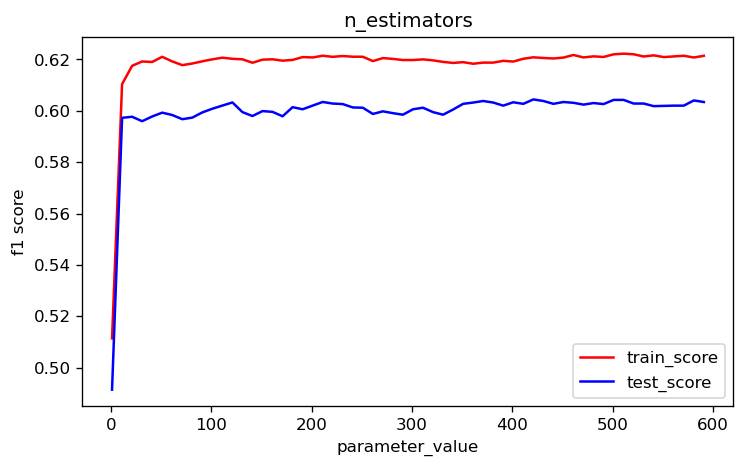

In [30]:
effect(train, test, range(1,600,10), 'n_estimators')

# max_samples

In [31]:
maxsamples = [i/1000 for i in range(1,1000)]
train = []
test = []

for i in maxsamples:  
  model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,
              n_jobs = -1, max_depth = 7, random_state = 101, max_samples = i)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

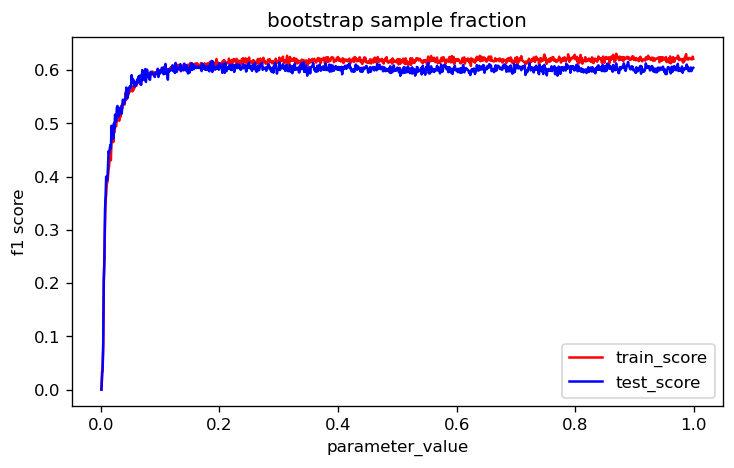

In [32]:
effect( train, test, maxsamples , 'bootstrap sample fraction')

# max features

In [33]:
maxfeatures = range(1,X.shape[1])
train = []
test = []

for i in maxfeatures:  
  model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,
              n_jobs = -1, max_depth = 7, random_state = 101, max_features = i)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

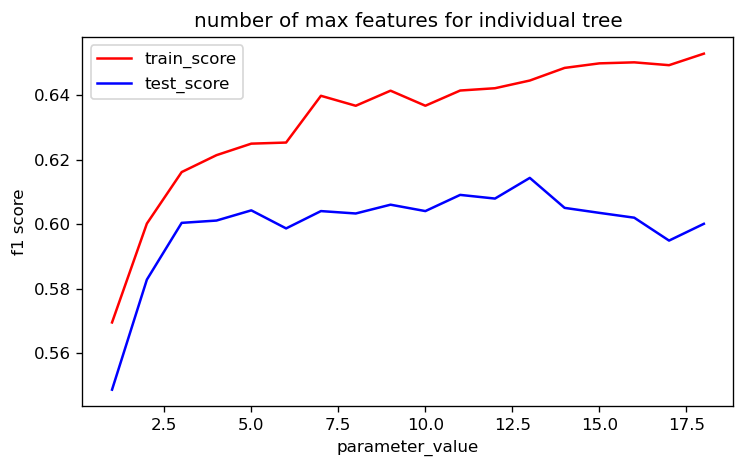

In [34]:
effect( train, test, maxfeatures , 'number of max features for individual tree')